In [187]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

In [188]:
def bootstrap_hypothesis_tests(g1, g2, Hypothesis_testing_func, n_bootstrap, **kwargs):

    bootstrap_statistics = np.zeros((n_bootstrap, 2))
    sample_statistics = Hypothesis_testing_func(g1, g2, **kwargs)

    g1_bootstrap = np.random.choice(g1, size=(n_bootstrap, len(g1))) 
    g2_bootstrap = np.random.choice(g2, size=(n_bootstrap, len(g2))) 

    for i in range(n_bootstrap):
        bootstrap_statistics[i] = Hypothesis_testing_func(g1_bootstrap[i], g2_bootstrap[i], **kwargs)[:2]

    return sample_statistics, bootstrap_statistics, [g1_bootstrap, g2_bootstrap]

In [230]:
itr = 100
n_bootstrap = 150
sample_size = 100
sample_statistics = np.zeros((itr, 2))
bootstrap_statistics = np.zeros((itr, n_bootstrap, 2))
sample_mean = np.zeros((itr))
sample_std = np.zeros((itr))
bs_mean = np.zeros((itr, n_bootstrap))
bs_std = np.zeros((itr, n_bootstrap))

for i in range(itr):
    
    g1 = np.random.normal(loc=0, scale=.2, size=sample_size)
    g2 = np.random.normal(loc=0, scale=.2, size=sample_size)
    all_samples = np.concatenate([g1, g2])
    sample_mean[i] = np.mean(all_samples)
    sample_std[i] = np.std(all_samples)

    sample_statistics[i], bootstrap_statistics[i], bootstrap_samples = bootstrap_hypothesis_tests(g1, g2, stats.ttest_ind, n_bootstrap)
    concatentated_bootstrap = [np.concatenate([bootstrap_samples[0][j],bootstrap_samples[1][j]]) for j in range(n_bootstrap)]
    bs_mean[i] = np.mean(concatentated_bootstrap, axis=1)
    bs_std[i] = np.std(concatentated_bootstrap, axis=1)
    
    

In [231]:
pvalues_bs = bootstrap_statistics[:,:,1]
significant_portion = np.mean(pvalues_bs < 0.05, axis=1)

In [232]:
far_from_uniform_idx = np.where(significant_portion > 0.3)
unifrom_idx = np.where(significant_portion < 0.1)

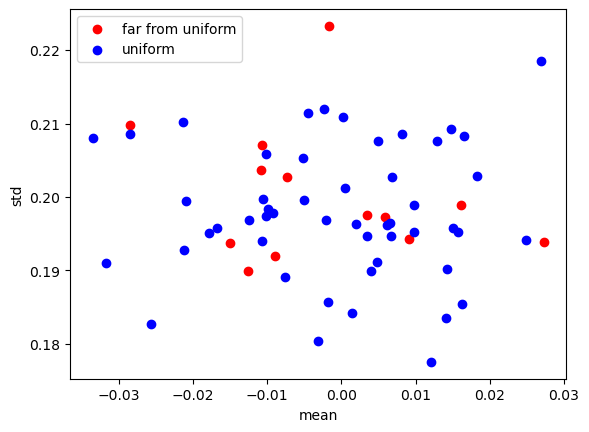

In [233]:
plt.scatter(sample_mean[far_from_uniform_idx], sample_std[far_from_uniform_idx], c='r', label='far from uniform')
plt.scatter(sample_mean[unifrom_idx], sample_std[unifrom_idx], c='b', label='uniform')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()

In [234]:
tstats_bs = bootstrap_statistics[:,:,0]
tstats_bs_mean = np.mean(tstats_bs, axis=1)
tstats_bs_std = np.std(tstats_bs, axis=1)

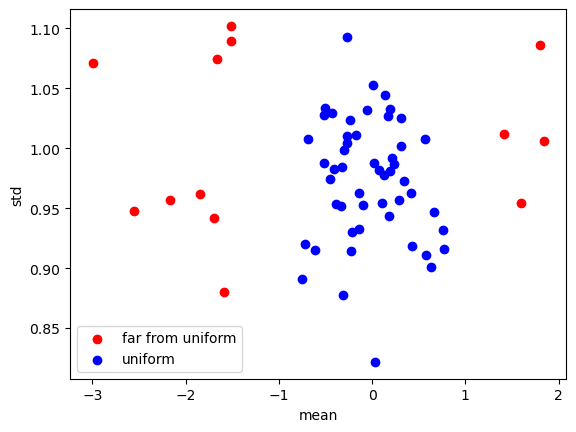

In [235]:
plt.scatter(tstats_bs_mean[far_from_uniform_idx], tstats_bs_std[far_from_uniform_idx], c='r', label='far from uniform')
plt.scatter(tstats_bs_mean[unifrom_idx], tstats_bs_std[unifrom_idx], c='b', label='uniform')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()

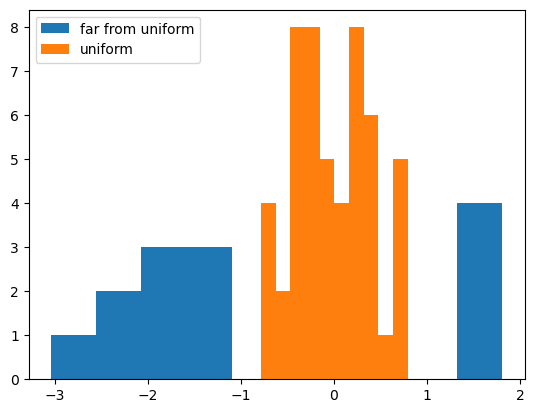

In [236]:
sample_tstat = sample_statistics[:,0]
plt.hist(sample_tstat[far_from_uniform_idx], label='far from uniform')
plt.hist(sample_tstat[unifrom_idx], label='uniform')
plt.legend()

In [237]:
mean_pvalue_bs = np.mean(pvalues_bs, axis=1)
std_pvalue_bs = np.std(pvalues_bs, axis=1)

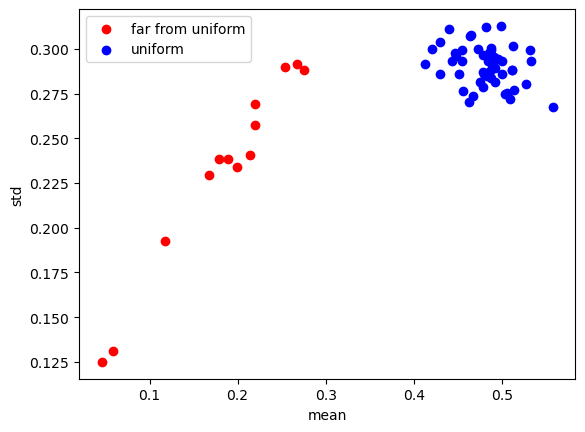

In [238]:
plt.scatter(mean_pvalue_bs[far_from_uniform_idx], std_pvalue_bs[far_from_uniform_idx], c='r', label='far from uniform')
plt.scatter(mean_pvalue_bs[unifrom_idx], std_pvalue_bs[unifrom_idx], c='b', label='uniform')
plt.xlabel('mean')
plt.ylabel('std')
plt.legend()
plt.show()